# Exploratory Data Analysis:
1. Understanding the data
   a. df.shape - rows and column number
   b. df.head() - check to give 5 rows
   c. df.columns - what all columns
   d. df.info() - column name, dtypes
   e. df.describe() - summary satistics
   f. df.isnull().sum() - check for missing 
   g. df.column_name.value_counts() - check the number of each unique data under column
   h. df.duplicated.sum() - Check for duplication
   i. df.plot(kind = 'box') - Check for outlier
   j. df.corr() - Correlation

2. Visualization (univariate and bivariate) (Descriptive Analytics - what is happening in the past):

   Univariate
   a. Histogram
   b. Pie chart
   c. Box plot
   
   Bivariate:
   a. Scatter Plot
   b. Bar Plot
   c. Pair Plot

# Data Preprocessing:
1. Handling Missing values
2. Handling Outlier values
3. Remove Noisy data
4. Dropping unwanted columns
5. Dropping Duplicates
6. Encoding of Categorical data
7. Feature scaling on Numerical data(Standardisation/ Normalisation)
8. Feature Engineering
9. Feature Selection

# Split the data
1. Train and Test Spilt

# Model
1. Model on Train  data
2. Finetune the Model
3. Finalize the Model

# Predict the result
1. Predict the Train
2. Predict the Test

# Evalution
1. Evaluation of Train data (Error Metrics)
2. Evaluation of Test data

# Comparison
1. Compare the train and test results based on that take the decision to iterate the step from Data preprocessing

# Deploy the Model
# End Point

# Monitoring

# Retraining (on sufficient interval)

In [6]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.feature_selection import SelectKBest, f_regression
pd.options.display.float_format = '{:.2f}'.format

In [7]:
#Outlier - Standard scaler - persisted

In [8]:
# Load the data
data = pd.read_csv('housing_prices_dataset.csv')

In [9]:
data

,Size,Bedrooms,Bathrooms,Neighborhood,YearBuilt,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price
0,10000.00,NaN,NaN,Commercial,1973,NaN,Medium,30.00,5.49,1488980.07
1,1930.87,4.00,3.00,Industrial,1928,0.00,Medium,1.80,7.00,638342.80
2,2323.84,5.00,1.00,Commercial,2009,0.00,Medium,7.57,3.09,585864.15
3,2761.51,4.00,2.00,Industrial,1962,1.00,Low,2.76,5.36,714818.82
4,1882.92,3.00,2.00,Suburb,2001,0.00,Medium,5.54,3.72,563705.77
...,...,...,...,...,...,...,...,...,...,...
4995,1975.52,2.00,NaN,Industrial,1948,0.00,Medium,4.50,4.56,557243.49
4996,2355.71,4.00,2.00,Commercial,1936,0.00,Low,3.16,4.54,689191.72
4997,3556.46,2.00,1.00,Industrial,1930,0.00,Low,5.28,6.34,760530.27
4998,2404.02,2.00,1.00,Suburb,1930,1.00,Low,6.53,6.88,575174.84


# Understanding the data

In [11]:
data.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'HasGarage', 'LuxuryRating', 'ProximityToCityCenter', 'Condition',
       'Price'],
      dtype='object')

In [12]:
data.dtypes

Size                     float64
Bedrooms                 float64
Bathrooms                float64
Neighborhood              object
YearBuilt                  int64
HasGarage                float64
LuxuryRating              object
ProximityToCityCenter    float64
Condition                float64
Price                    float64
dtype: object

In [13]:
data.shape

(5000, 10)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Size                   5000 non-null   float64
 1   Bedrooms               4500 non-null   float64
 2   Bathrooms              4666 non-null   float64
 3   Neighborhood           5000 non-null   object 
 4   YearBuilt              5000 non-null   int64  
 5   HasGarage              4750 non-null   float64
 6   LuxuryRating           5000 non-null   object 
 7   ProximityToCityCenter  5000 non-null   float64
 8   Condition              5000 non-null   float64
 9   Price                  5000 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 390.8+ KB


In [15]:
data.describe()

,Size,Bedrooms,Bathrooms,YearBuilt,HasGarage,ProximityToCityCenter,Condition,Price
count,5000.00,4500.00,4666.00,5000.00,4750.00,5000.00,5000.00,5000.00
mean,2163.99,3.00,2.01,1959.81,0.49,5.25,5.02,603261.56
std,1223.45,1.43,0.81,35.33,0.50,3.19,1.98,176171.91
min,379.37,1.00,1.00,1900.00,0.00,-1.88,-3.37,257086.63
25%,1678.03,2.00,1.00,1929.00,0.00,3.60,3.67,522737.75
50%,2019.06,3.00,2.00,1959.50,0.00,5.02,5.02,584312.14
75%,2354.86,4.00,3.00,1991.00,1.00,6.37,6.37,648272.31
max,10000.00,5.00,3.00,2020.00,1.00,30.00,11.69,1837661.95


In [16]:
# IPL Team Owner

# 2 Players

# 1st Player
# Batting Average = 60
# STD             = 50

# 2nd Player
# Batting Average = 40
# STD             = 5

# Player 1 = 10 - 110
# Player 2 = 35 - 45


In [17]:
# Row Duplication
data.duplicated().sum()

0

In [18]:
data.isnull().sum()

Size                       0
Bedrooms                 500
Bathrooms                334
Neighborhood               0
YearBuilt                  0
HasGarage                250
LuxuryRating               0
ProximityToCityCenter      0
Condition                  0
Price                      0
dtype: int64

<Axes: >

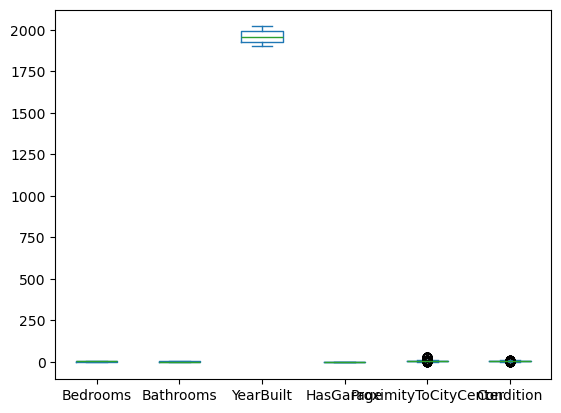

In [19]:
data.drop(columns = ['Price','Size']).plot(kind = 'box')

In [20]:
num_col = data.select_dtypes(include='number').columns

Size


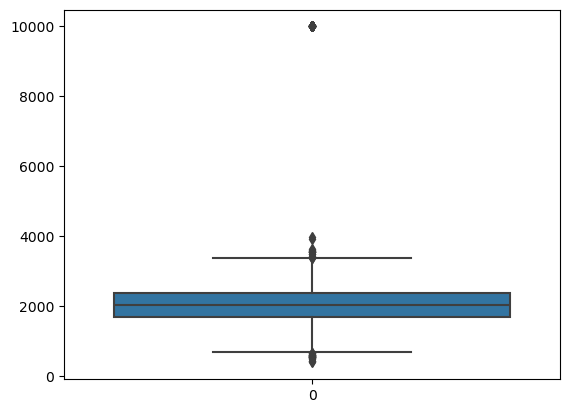

Bedrooms


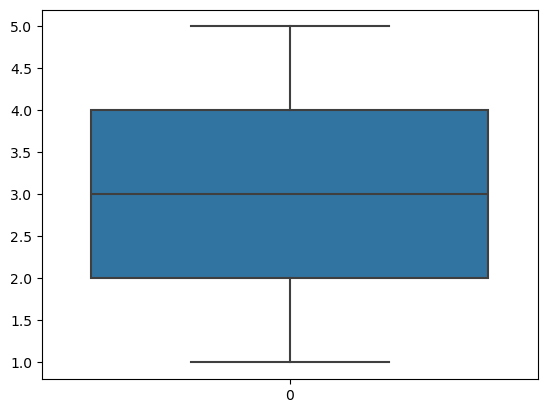

Bathrooms


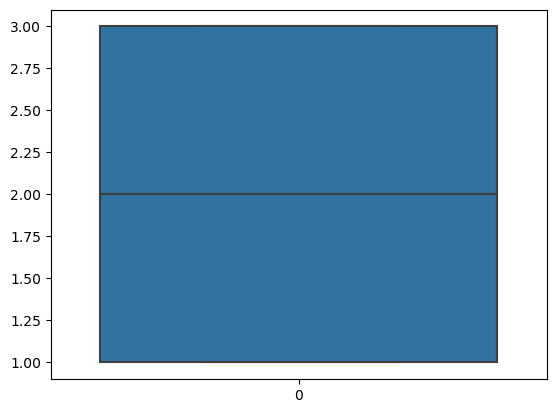

YearBuilt


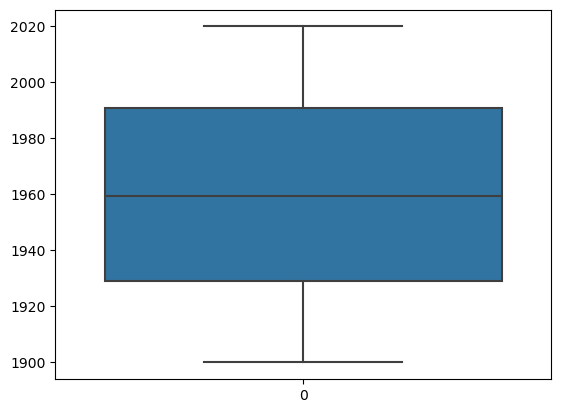

HasGarage


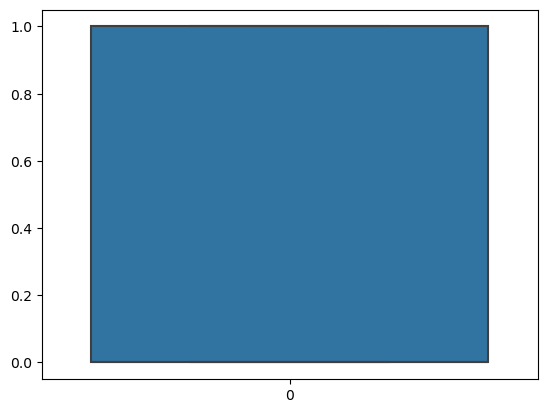

ProximityToCityCenter


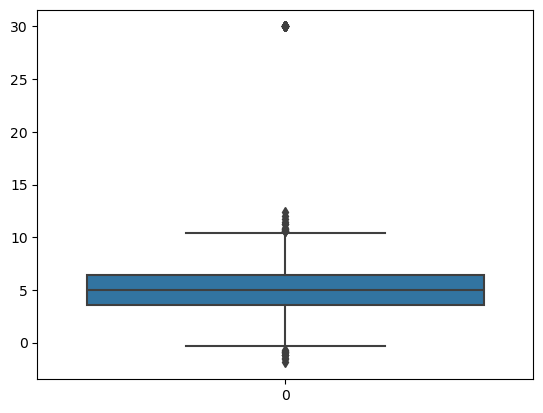

Condition


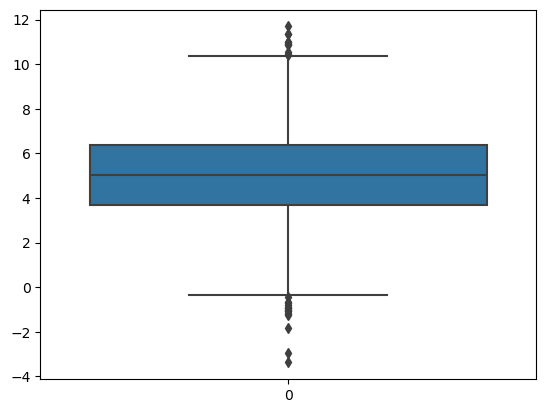

Price


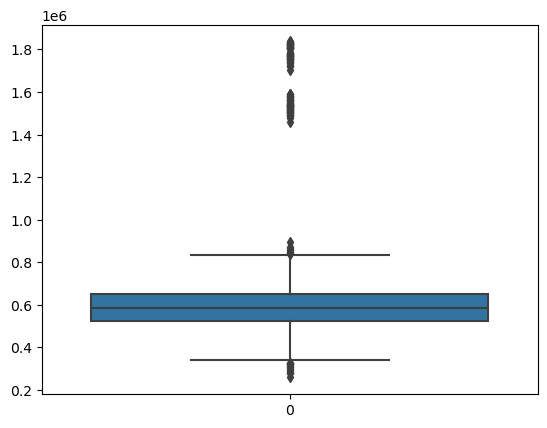

In [21]:
for col in num_col:
    print(col)
    sns.boxplot(data[col])
    plt.show()

In [22]:
data.head()

,Size,Bedrooms,Bathrooms,Neighborhood,YearBuilt,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price
0,10000.00,NaN,NaN,Commercial,1973,NaN,Medium,30.00,5.49,1488980.07
1,1930.87,4.00,3.00,Industrial,1928,0.00,Medium,1.80,7.00,638342.80
2,2323.84,5.00,1.00,Commercial,2009,0.00,Medium,7.57,3.09,585864.15
3,2761.51,4.00,2.00,Industrial,1962,1.00,Low,2.76,5.36,714818.82
4,1882.92,3.00,2.00,Suburb,2001,0.00,Medium,5.54,3.72,563705.77


<Axes: >

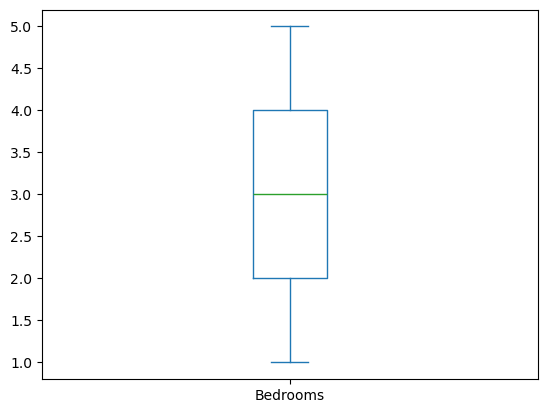

In [23]:
data['Bedrooms'].plot(kind = 'box')

<Axes: >

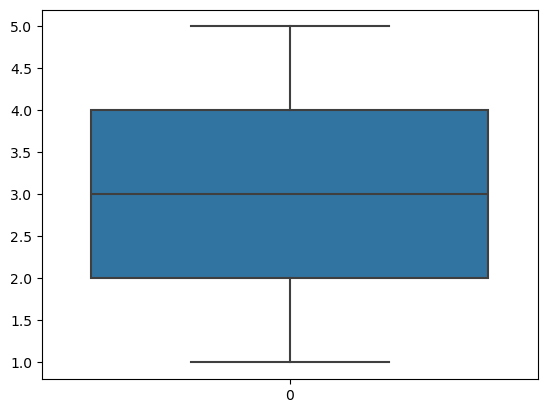

In [24]:
sns.boxplot(data['Bedrooms'])

In [25]:
data[num_col].corr()

,Size,Bedrooms,Bathrooms,YearBuilt,HasGarage,ProximityToCityCenter,Condition,Price
Size,1.00,-0.00,0.00,-0.01,-0.00,0.50,-0.00,0.95
Bedrooms,-0.00,1.00,-0.01,0.00,-0.01,-0.00,0.00,0.39
Bathrooms,0.00,-0.01,1.00,-0.01,0.01,0.00,0.00,0.16
YearBuilt,-0.01,0.00,-0.01,1.00,0.02,0.01,0.02,0.01
HasGarage,-0.00,-0.01,0.01,0.02,1.00,0.02,-0.01,-0.01
ProximityToCityCenter,0.50,-0.00,0.00,0.01,0.02,1.00,-0.01,0.34
Condition,-0.00,0.00,0.00,0.02,-0.01,-0.01,1.00,0.01
Price,0.95,0.39,0.16,0.01,-0.01,0.34,0.01,1.00


<Axes: >

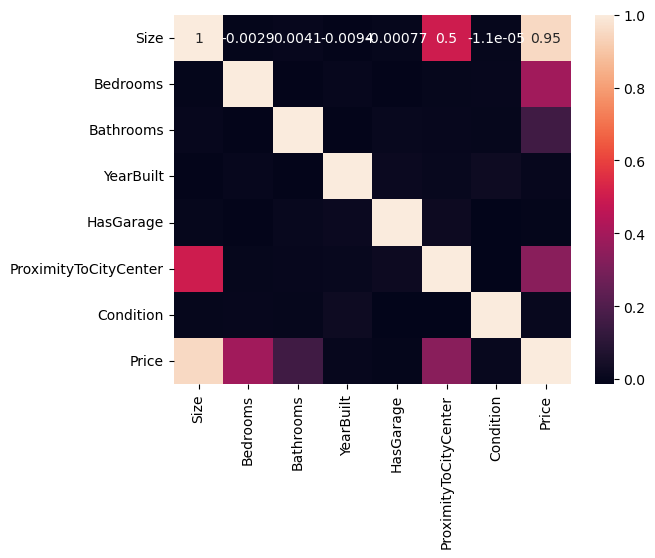

In [26]:
sns.heatmap(data[num_col].corr(), annot = True)

In [27]:
# EDA

<Axes: >

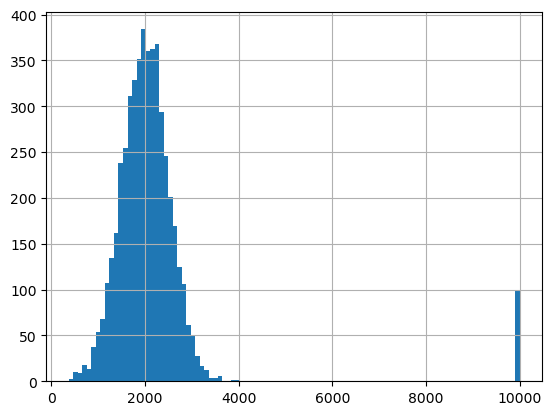

In [28]:
data['Size'].hist(bins = 100)

In [29]:
# 2,5,6,8,10,20,40
# 2-5  - 2
# 6-8  - 2
# 9-11 - 1
# 12-14 - 0
# 15-17 - 0
# 18-20  - 1
# 21-23



# 37-40 - 1

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

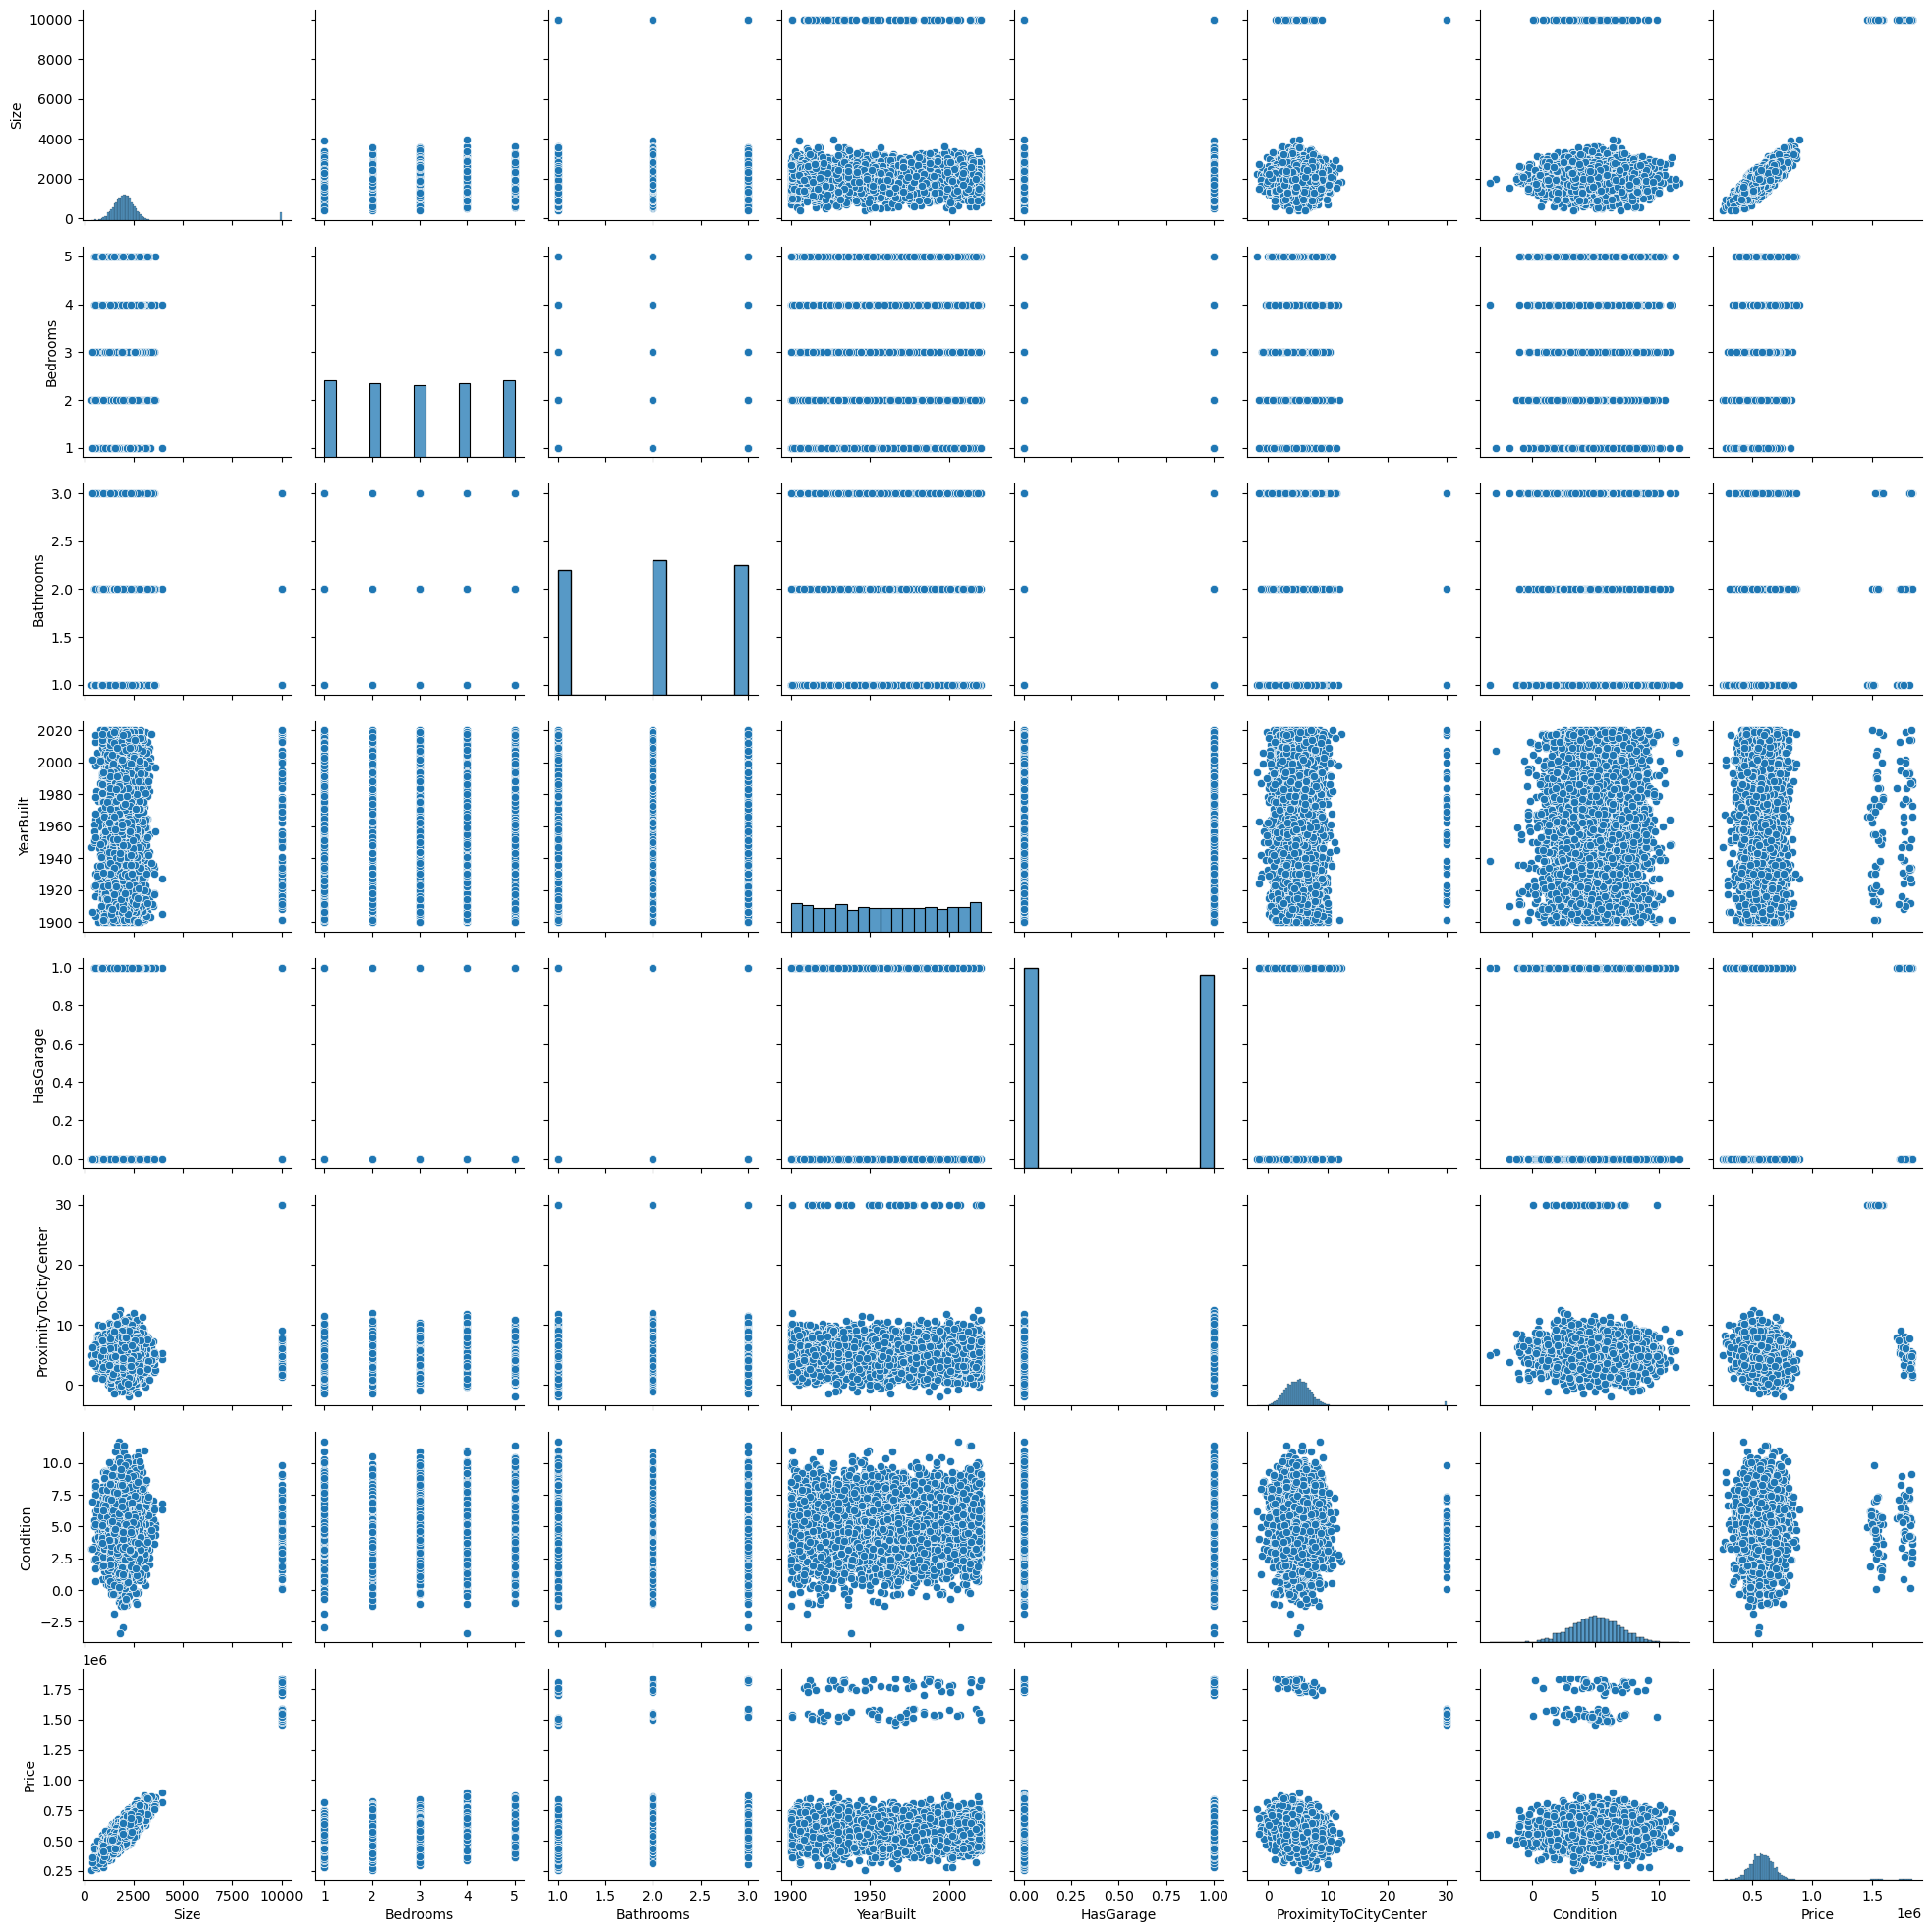

In [30]:
#Bivariate
sns.pairplot(data[num_col])

In [31]:
data['Bedrooms'].value_counts()

Bedrooms
1.00    926
5.00    925
4.00    894
2.00    888
3.00    867
Name: count, dtype: int64

<Axes: ylabel='count'>

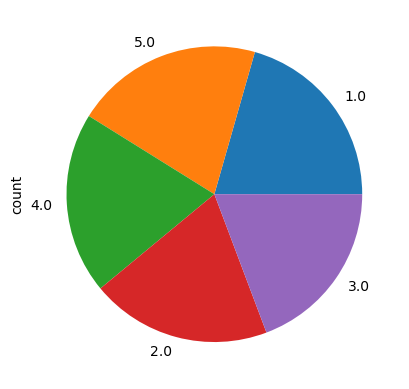

In [32]:
data['Bedrooms'].value_counts().plot(kind = 'pie')

In [33]:
data.groupby('Bedrooms').Price.mean()

Bedrooms
1.00   530282.86
2.00   560028.42
3.00   578849.04
4.00   604102.97
5.00   633199.63
Name: Price, dtype: float64

<Axes: xlabel='Bedrooms'>

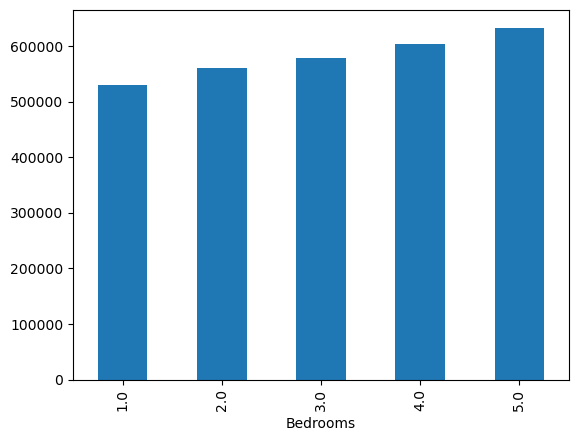

In [34]:
data.groupby('Bedrooms').Price.mean().plot(kind = 'bar')

<Axes: xlabel='Bathrooms'>

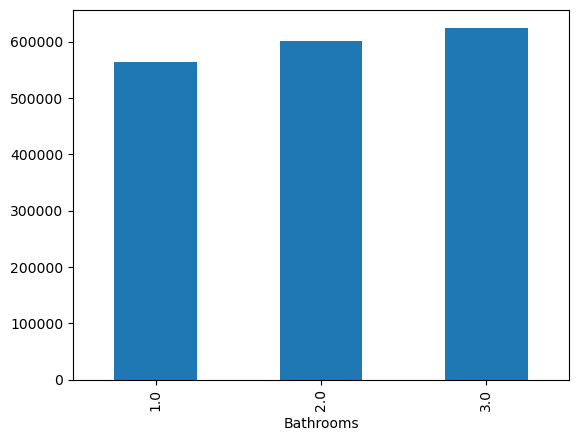

In [35]:
data.groupby('Bathrooms').Price.mean().plot(kind = 'bar')


In [36]:
data.groupby(['Bedrooms','Neighborhood','Bathrooms']).Price.mean().to_csv('result.csv')

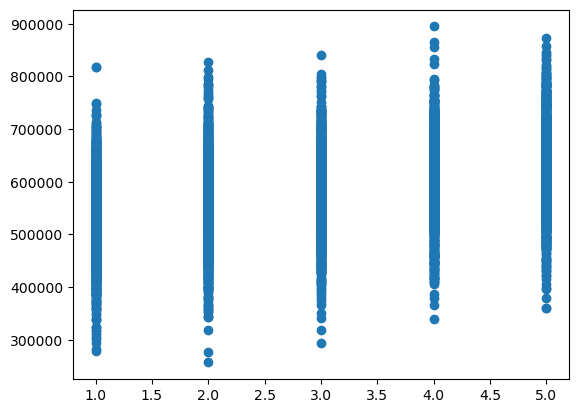

In [37]:
plt.scatter(data['Bedrooms'], data['Price'])
plt.savefig('bathrooms_price_scatter.png')

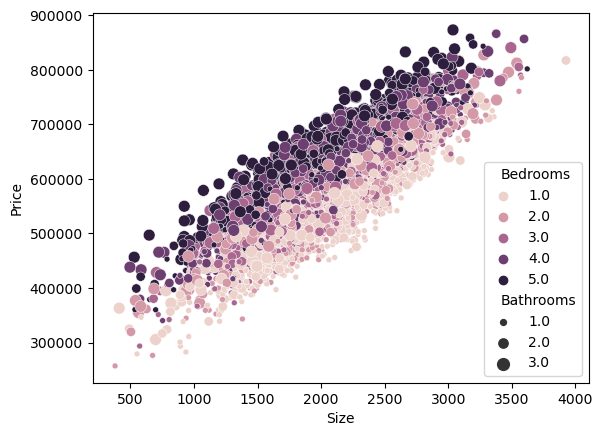

In [38]:
sns.scatterplot(x = data['Size'], y = data['Price'], hue=data['Bedrooms'], size=data['Bathrooms'])
plt.savefig('bathrooms_bedrooms_size_price_scatter.png')

# Pre-Processing

In [40]:
data.isna().sum()

Size                       0
Bedrooms                 500
Bathrooms                334
Neighborhood               0
YearBuilt                  0
HasGarage                250
LuxuryRating               0
ProximityToCityCenter      0
Condition                  0
Price                      0
dtype: int64

In [41]:
data.shape

(5000, 10)

1. Impute the Bedrooms with mode
2. Impute the Bathrooms with respect to Bedrooms 
3. Drop the rows with null HasGarage

In [43]:
data['Bedrooms'].mode()[0]

1.0

In [44]:
data['Bedrooms'].mean()

3.000888888888889

In [45]:
data['Bedrooms'].fillna(data['Bedrooms'].mode()[0], inplace = True)
data['Bathrooms'].fillna(data['Bathrooms'].mode()[0], inplace = True)
data['HasGarage'].fillna(data['HasGarage'].mode()[0], inplace = True)

1
1
1
2
2
2
3
3
3

Mode = 1,2,3 

Mean  = can be only one
Median  = can be only one
Mode = can be one or more than one

Mean = may or may not be inside the data
Median = May or may not be inside the data
Mode = Will be inside the data


1,2,3,4,5 = 3
1,2,3,4  = 2.5


In [47]:
data['Bedrooms'].mode()

0   1.00
Name: Bedrooms, dtype: float64

In [48]:
data.isna().sum()

Size                     0
Bedrooms                 0
Bathrooms                0
Neighborhood             0
YearBuilt                0
HasGarage                0
LuxuryRating             0
ProximityToCityCenter    0
Condition                0
Price                    0
dtype: int64

In [49]:
data[data['Size']>9000]

,Size,Bedrooms,Bathrooms,Neighborhood,YearBuilt,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price
0,10000.00,1.00,2.00,Commercial,1973,0.00,Medium,30.00,5.49,1488980.07
50,10000.00,1.00,3.00,Suburb,1994,0.00,Medium,3.74,5.72,1810740.33
100,10000.00,1.00,1.00,Downtown,1972,0.00,Low,30.00,6.17,1485484.46
150,10000.00,1.00,2.00,Rural,1984,0.00,High,4.24,2.79,1788133.77
200,10000.00,1.00,3.00,Downtown,1952,0.00,Low,30.00,1.86,1579726.19
...,...,...,...,...,...,...,...,...,...,...
4750,10000.00,1.00,3.00,Commercial,1933,1.00,Medium,4.77,4.30,1809632.89
4800,10000.00,1.00,2.00,Commercial,1969,0.00,Low,30.00,4.75,1522276.06
4850,10000.00,1.00,3.00,Rural,2020,1.00,Low,4.78,9.16,1823190.27
4900,10000.00,1.00,2.00,Industrial,1984,0.00,Low,30.00,2.97,1543993.73


In [50]:
data = data[data['Size']<9000]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

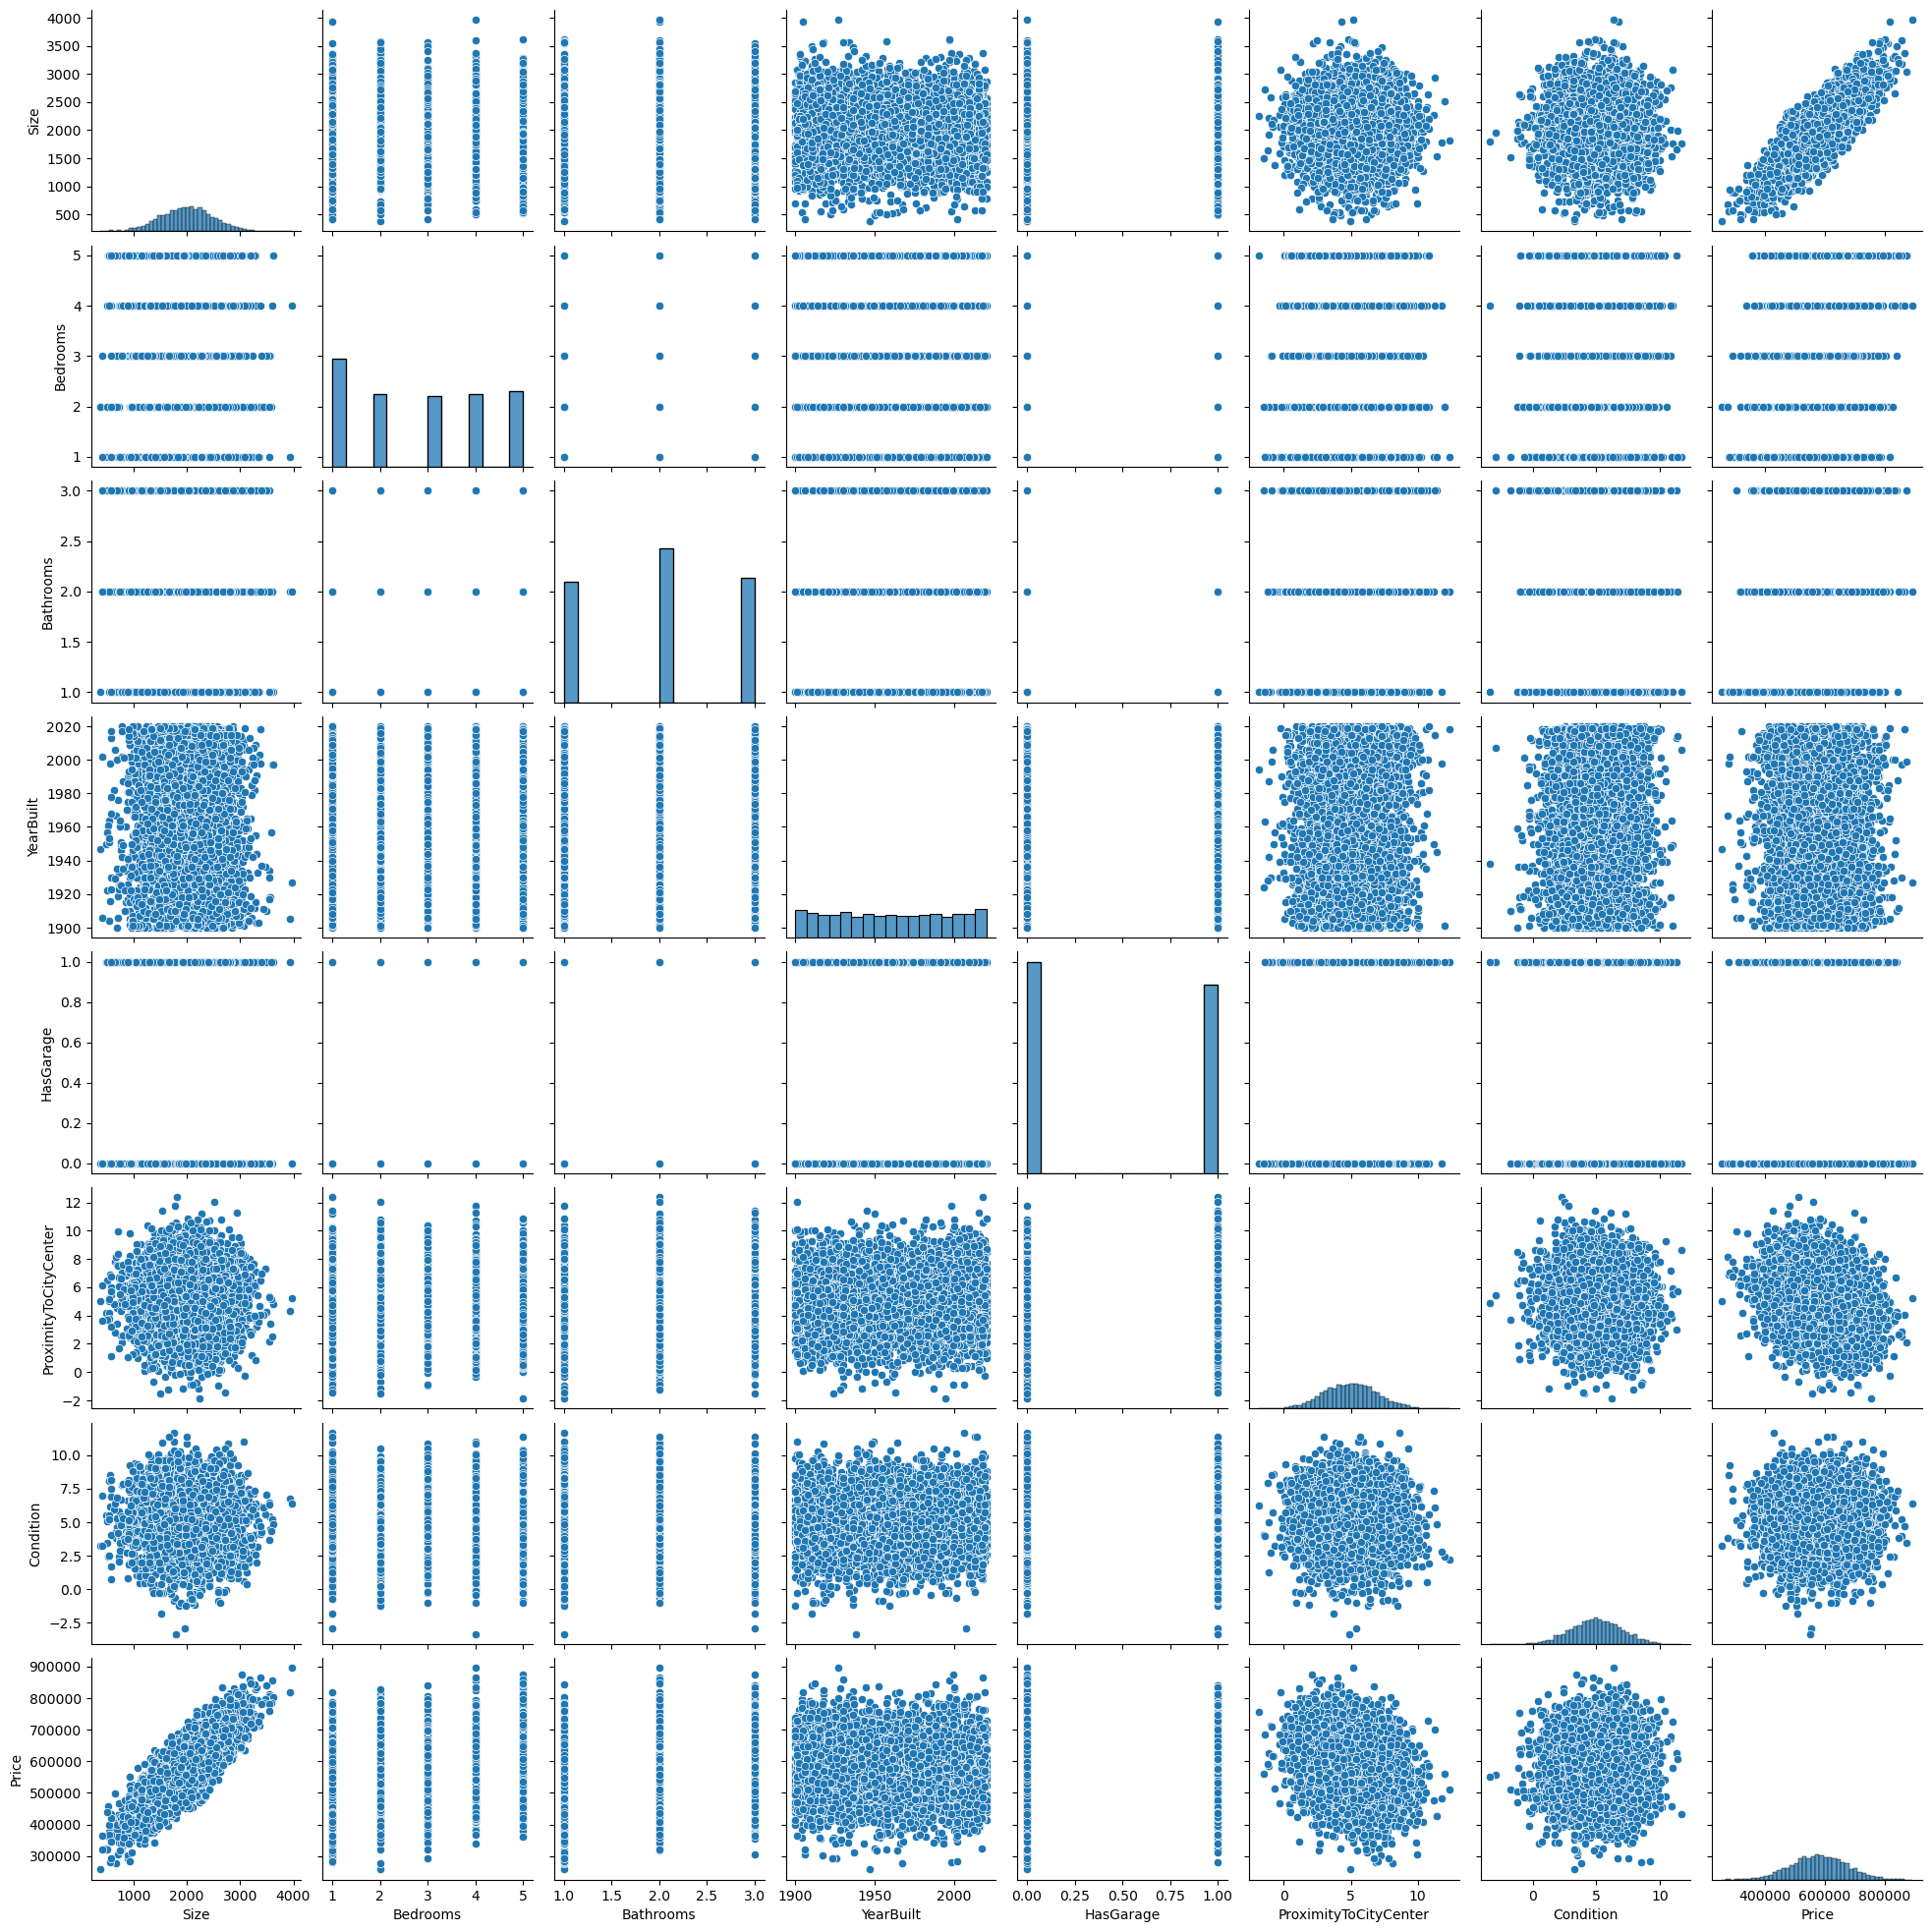

In [51]:
sns.pairplot(data)

In [52]:
data[num_col].corr()

,Size,Bedrooms,Bathrooms,YearBuilt,HasGarage,ProximityToCityCenter,Condition,Price
Size,1.00,-0.01,-0.01,-0.02,-0.00,-0.00,0.01,0.83
Bedrooms,-0.01,1.00,-0.01,0.00,0.04,0.00,0.01,0.35
Bathrooms,-0.01,-0.01,1.00,-0.01,0.01,-0.01,0.01,0.25
YearBuilt,-0.02,0.00,-0.01,1.00,0.01,0.02,0.02,0.01
HasGarage,-0.00,0.04,0.01,0.01,1.00,0.02,-0.02,-0.01
ProximityToCityCenter,-0.00,0.00,-0.01,0.02,0.02,1.00,-0.00,-0.23
Condition,0.01,0.01,0.01,0.02,-0.02,-0.00,1.00,0.01
Price,0.83,0.35,0.25,0.01,-0.01,-0.23,0.01,1.00


In [53]:
data

,Size,Bedrooms,Bathrooms,Neighborhood,YearBuilt,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price
1,1930.87,4.00,3.00,Industrial,1928,0.00,Medium,1.80,7.00,638342.80
2,2323.84,5.00,1.00,Commercial,2009,0.00,Medium,7.57,3.09,585864.15
3,2761.51,4.00,2.00,Industrial,1962,1.00,Low,2.76,5.36,714818.82
4,1882.92,3.00,2.00,Suburb,2001,0.00,Medium,5.54,3.72,563705.77
5,1882.93,5.00,2.00,Rural,1983,1.00,Low,4.34,3.45,623286.05
...,...,...,...,...,...,...,...,...,...,...
4995,1975.52,2.00,2.00,Industrial,1948,0.00,Medium,4.50,4.56,557243.49
4996,2355.71,4.00,2.00,Commercial,1936,0.00,Low,3.16,4.54,689191.72
4997,3556.46,2.00,1.00,Industrial,1930,0.00,Low,5.28,6.34,760530.27
4998,2404.02,2.00,1.00,Suburb,1930,1.00,Low,6.53,6.88,575174.84


In [54]:
data['HouseAge'] = 2024 - data['YearBuilt'] 

/var/folders/j8/wb7_9rh96f9g2r0vvmqchbd80000gn/T/ipykernel_56993/2993870485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HouseAge'] = 2024 - data['YearBuilt']


In [55]:
data['HouseAge']

1       96
2       15
3       62
4       23
5       41
        ..
4995    76
4996    88
4997    94
4998    94
4999    66
Name: HouseAge, Length: 4900, dtype: int64

In [56]:
data.drop(columns = 'YearBuilt', inplace = True)

/var/folders/j8/wb7_9rh96f9g2r0vvmqchbd80000gn/T/ipykernel_56993/743466755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = 'YearBuilt', inplace = True)


In [57]:
num_col = data.select_dtypes(include = 'number').columns

In [58]:
data[num_col].corr()

,Size,Bedrooms,Bathrooms,HasGarage,ProximityToCityCenter,Condition,Price,HouseAge
Size,1.00,-0.01,-0.01,-0.00,-0.00,0.01,0.83,0.02
Bedrooms,-0.01,1.00,-0.01,0.04,0.00,0.01,0.35,-0.00
Bathrooms,-0.01,-0.01,1.00,0.01,-0.01,0.01,0.25,0.01
HasGarage,-0.00,0.04,0.01,1.00,0.02,-0.02,-0.01,-0.01
ProximityToCityCenter,-0.00,0.00,-0.01,0.02,1.00,-0.00,-0.23,-0.02
Condition,0.01,0.01,0.01,-0.02,-0.00,1.00,0.01,-0.02
Price,0.83,0.35,0.25,-0.01,-0.23,0.01,1.00,-0.01
HouseAge,0.02,-0.00,0.01,-0.01,-0.02,-0.02,-0.01,1.00


In [59]:
data.head()

,Size,Bedrooms,Bathrooms,Neighborhood,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price,HouseAge
1,1930.87,4.00,3.00,Industrial,0.00,Medium,1.80,7.00,638342.80,96
2,2323.84,5.00,1.00,Commercial,0.00,Medium,7.57,3.09,585864.15,15
3,2761.51,4.00,2.00,Industrial,1.00,Low,2.76,5.36,714818.82,62
4,1882.92,3.00,2.00,Suburb,0.00,Medium,5.54,3.72,563705.77,23
5,1882.93,5.00,2.00,Rural,1.00,Low,4.34,3.45,623286.05,41


In [60]:
data['LuxuryRating'].value_counts()

LuxuryRating
Medium    2498
Low       1465
High       937
Name: count, dtype: int64

In [61]:
mapping = {'Low':1, 'Medium':2, 'High':3}

In [62]:
data['LuxuryRating'] = data['LuxuryRating'].map(mapping)

/var/folders/j8/wb7_9rh96f9g2r0vvmqchbd80000gn/T/ipykernel_56993/2583579078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LuxuryRating'] = data['LuxuryRating'].map(mapping)


In [63]:
data.head()

,Size,Bedrooms,Bathrooms,Neighborhood,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price,HouseAge
1,1930.87,4.00,3.00,Industrial,0.00,2,1.80,7.00,638342.80,96
2,2323.84,5.00,1.00,Commercial,0.00,2,7.57,3.09,585864.15,15
3,2761.51,4.00,2.00,Industrial,1.00,1,2.76,5.36,714818.82,62
4,1882.92,3.00,2.00,Suburb,0.00,2,5.54,3.72,563705.77,23
5,1882.93,5.00,2.00,Rural,1.00,1,4.34,3.45,623286.05,41


In [64]:
data['Neighborhood'].value_counts()

Neighborhood
Suburb        1038
Downtown      1016
Commercial     961
Rural          954
Industrial     931
Name: count, dtype: int64

In [65]:
#OneHot Encoding

data = pd.get_dummies(data, columns=['Neighborhood'],dtype='int' )

In [66]:
data

,Size,Bedrooms,Bathrooms,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price,HouseAge,Neighborhood_Commercial,Neighborhood_Downtown,Neighborhood_Industrial,Neighborhood_Rural,Neighborhood_Suburb
1,1930.87,4.00,3.00,0.00,2,1.80,7.00,638342.80,96,0,0,1,0,0
2,2323.84,5.00,1.00,0.00,2,7.57,3.09,585864.15,15,1,0,0,0,0
3,2761.51,4.00,2.00,1.00,1,2.76,5.36,714818.82,62,0,0,1,0,0
4,1882.92,3.00,2.00,0.00,2,5.54,3.72,563705.77,23,0,0,0,0,1
5,1882.93,5.00,2.00,1.00,1,4.34,3.45,623286.05,41,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1975.52,2.00,2.00,0.00,2,4.50,4.56,557243.49,76,0,0,1,0,0
4996,2355.71,4.00,2.00,0.00,1,3.16,4.54,689191.72,88,1,0,0,0,0
4997,3556.46,2.00,1.00,0.00,1,5.28,6.34,760530.27,94,0,0,1,0,0
4998,2404.02,2.00,1.00,1.00,1,6.53,6.88,575174.84,94,0,0,0,0,1


# Scaling

In [68]:
scaling = StandardScaler()

In [69]:
X = data.drop(columns='Price')

In [70]:
X.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'HasGarage', 'LuxuryRating',
       'ProximityToCityCenter', 'Condition', 'HouseAge',
       'Neighborhood_Commercial', 'Neighborhood_Downtown',
       'Neighborhood_Industrial', 'Neighborhood_Rural', 'Neighborhood_Suburb'],
      dtype='object')

In [71]:
scaled_features = X.columns

In [72]:
data[scaled_features] = scaling.fit_transform(data[scaled_features])

In [73]:
data

,Size,Bedrooms,Bathrooms,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price,HouseAge,Neighborhood_Commercial,Neighborhood_Downtown,Neighborhood_Industrial,Neighborhood_Rural,Neighborhood_Suburb
1,-0.15,0.79,1.26,-0.95,0.16,-1.60,1.00,638342.80,0.90,-0.49,-0.51,2.06,-0.49,-0.52
2,0.64,1.47,-1.29,-0.95,0.16,1.28,-0.97,585864.15,-1.39,2.02,-0.51,-0.48,-0.49,-0.52
3,1.52,0.79,-0.01,1.06,-1.29,-1.12,0.17,714818.82,-0.06,-0.49,-0.51,2.06,-0.49,-0.52
4,-0.24,0.11,-0.01,-0.95,0.16,0.27,-0.65,563705.77,-1.16,-0.49,-0.51,-0.48,-0.49,1.93
5,-0.24,1.47,-0.01,1.06,-1.29,-0.33,-0.79,623286.05,-0.66,-0.49,-0.51,-0.48,2.03,-0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.06,-0.57,-0.01,-0.95,0.16,-0.25,-0.23,557243.49,0.33,-0.49,-0.51,2.06,-0.49,-0.52
4996,0.71,0.79,-0.01,-0.95,-1.29,-0.92,-0.24,689191.72,0.67,2.02,-0.51,-0.48,-0.49,-0.52
4997,3.11,-0.57,-1.29,-0.95,-1.29,0.14,0.66,760530.27,0.84,-0.49,-0.51,2.06,-0.49,-0.52
4998,0.80,-0.57,-1.29,1.06,-1.29,0.76,0.94,575174.84,0.84,-0.49,-0.51,-0.48,-0.49,1.93


In [74]:
data.corr()

,Size,Bedrooms,Bathrooms,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price,HouseAge,Neighborhood_Commercial,Neighborhood_Downtown,Neighborhood_Industrial,Neighborhood_Rural,Neighborhood_Suburb
Size,1.00,-0.01,-0.01,-0.00,-0.02,-0.00,0.01,0.83,0.02,-0.01,-0.02,0.01,0.01,0.01
Bedrooms,-0.01,1.00,-0.01,0.04,0.00,0.00,0.01,0.35,-0.00,-0.00,0.01,-0.00,0.01,-0.01
Bathrooms,-0.01,-0.01,1.00,0.01,-0.02,-0.01,0.01,0.25,0.01,-0.00,-0.01,-0.00,0.01,0.00
HasGarage,-0.00,0.04,0.01,1.00,0.01,0.02,-0.02,-0.01,-0.01,-0.01,-0.00,0.02,0.02,-0.02
LuxuryRating,-0.02,0.00,-0.02,0.01,1.00,-0.01,0.01,-0.02,0.02,-0.02,-0.01,0.01,0.01,0.01
ProximityToCityCenter,-0.00,0.00,-0.01,0.02,-0.01,1.00,-0.00,-0.23,-0.02,0.00,-0.00,-0.00,0.01,-0.00
Condition,0.01,0.01,0.01,-0.02,0.01,-0.00,1.00,0.01,-0.02,0.01,-0.00,-0.01,-0.02,0.02
Price,0.83,0.35,0.25,-0.01,-0.02,-0.23,0.01,1.00,-0.01,-0.01,-0.01,0.00,0.02,0.00
HouseAge,0.02,-0.00,0.01,-0.01,0.02,-0.02,-0.02,-0.01,1.00,0.01,0.01,-0.02,0.00,-0.00
Neighborhood_Commercial,-0.01,-0.00,-0.00,-0.01,-0.02,0.00,0.01,-0.01,0.01,1.00,-0.25,-0.24,-0.24,-0.26


In [75]:
X = data.drop(columns = 'Price')
y = data['Price']

# Data Split

In [77]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=31)

# Model

In [79]:
model = LinearRegression()

In [80]:
model.fit(train_X, train_y)

LinearRegression()

In [81]:
model.coef_

array([ 7.48485184e+04,  3.17762430e+04,  2.37154392e+04, -1.68356863e+03,
        1.22306689e+02, -2.04181864e+04,  1.84356819e+02, -3.36751909e+03,
        2.68199788e+16,  2.73835791e+16,  2.64983686e+16,  2.67458543e+16,
        2.75999667e+16])

<Axes: >

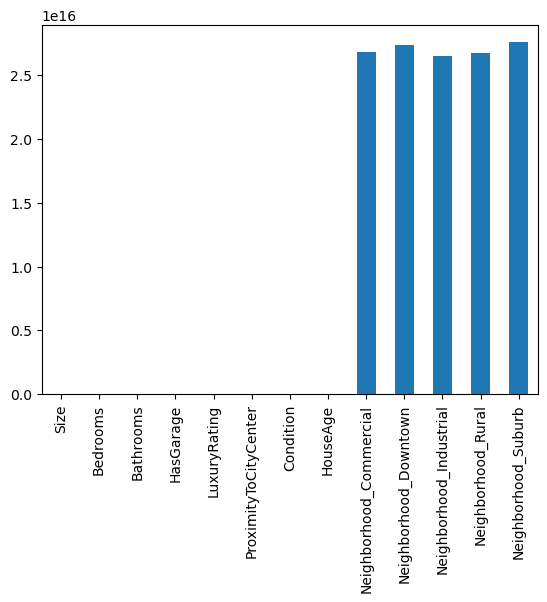

In [82]:
pd.Series(model.coef_, index = X.columns).plot(kind = 'bar')

In [83]:
model.intercept_

581700.0497498657

# Prediction

In [85]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [172]:
train_X

,Size,Bedrooms,Bathrooms,LuxuryRating,ProximityToCityCenter
4472,1.29,0.79,1.26,0.16,1.38
4425,-1.14,1.47,-0.01,-1.29,0.98
1691,-0.48,-0.57,-0.01,1.60,0.65
1095,-0.09,-1.25,-0.01,-1.29,0.61
1096,0.07,0.79,-1.29,-1.29,-0.99
...,...,...,...,...,...
843,0.38,-0.57,-1.29,0.16,-0.87
3812,-0.87,1.47,1.26,1.60,-0.36
3003,1.89,0.11,1.26,0.16,0.74
2107,0.63,0.79,-0.01,-1.29,-0.21


# Evaluation

In [87]:
def evaluate(actual, pred, source):
    print(source)
    print("MSE")
    print(mean_squared_error(actual, pred))
    print("RMSE")
    print(np.sqrt(mean_squared_error(actual, pred)))
    print("MAPE")
    print(mean_absolute_percentage_error(actual, pred)) 
    print("R2 score")
    print(r2_score(actual, pred)) 
    return [mean_squared_error(actual, pred), np.sqrt(mean_squared_error(actual, pred)), r2_score(actual, pred), mean_absolute_percentage_error(actual, pred)]

In [88]:
train_result = evaluate(train_y, train_pred, 'TRAIN DATA RESULT')
test_result = evaluate(test_y, test_pred, 'TEST DATA RESULT')

TRAIN DATA RESULT
MSE
576646296.351464
RMSE
24013.460732503012
MAPE
0.033488651731587486
R2 score
0.9281154117536818
TEST DATA RESULT
MSE
521377645.24021643
RMSE
22833.695391684116
MAPE
0.031334731912415086
R2 score
0.9375069401841405


In [89]:
train_result

[576646296.351464,
 24013.460732503012,
 0.9281154117536818,
 0.033488651731587486]

In [90]:
test_result

[521377645.24021643,
 22833.695391684116,
 0.9375069401841405,
 0.031334731912415086]

In [91]:
res = [train_result] + [test_result]

In [92]:
res

[[576646296.351464,
  24013.460732503012,
  0.9281154117536818,
  0.033488651731587486],
 [521377645.24021643,
  22833.695391684116,
  0.9375069401841405,
  0.031334731912415086]]

In [95]:
pd.DataFrame(res, columns=['MSE','RMSE','MAPE', 'R2 Score' ], index = ['Train', 'Test'])

,MSE,RMSE,MAPE,R2 Score
Train,576646296.35,24013.46,0.93,0.03
Test,521377645.24,22833.70,0.94,0.03


In [97]:
X.shape

(4900, 13)

# Feature Selection

In [100]:
select_k_best = SelectKBest(f_regression, k= 5 )

In [102]:
X_select = select_k_best.fit_transform(X,y)

In [104]:
select_k_best.get_support()

array([ True,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False])

In [106]:
X.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'HasGarage', 'LuxuryRating',
       'ProximityToCityCenter', 'Condition', 'HouseAge',
       'Neighborhood_Commercial', 'Neighborhood_Downtown',
       'Neighborhood_Industrial', 'Neighborhood_Rural', 'Neighborhood_Suburb'],
      dtype='object')

In [108]:
selected_feature_names = X.columns[select_k_best.get_support()]

In [110]:
selected_feature_names

Index(['Size', 'Bedrooms', 'Bathrooms', 'LuxuryRating',
       'ProximityToCityCenter'],
      dtype='object')

# Model After Feature Selection

In [117]:
X = X[selected_feature_names]

In [119]:
X = X[selected_feature_names]
y = data['Price']

# Data Split

In [122]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=31)

# Model

In [125]:
train_X.shape

(3430, 5)

In [127]:
model = LinearRegression()

In [129]:
model.fit(train_X, train_y)

LinearRegression()

In [131]:
model.coef_

array([ 7.47730161e+04,  3.16932330e+04,  2.37117472e+04,  5.63573846e+01,
       -2.03867742e+04])

<Axes: >

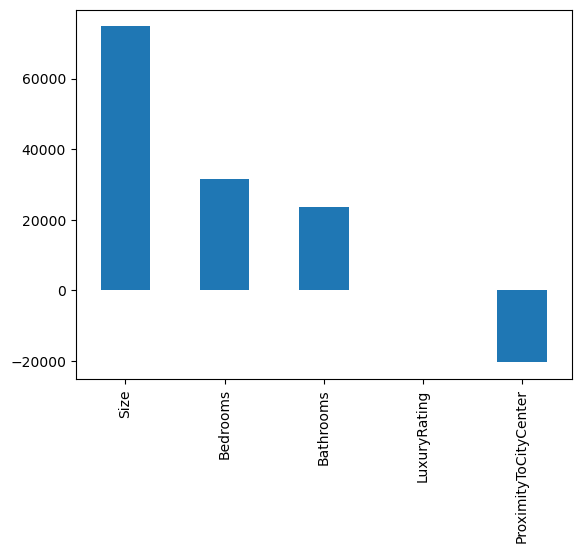

In [133]:
pd.Series(model.coef_, index = X.columns).plot(kind = 'bar')

In [135]:
model.intercept_

581670.0006187578

# Prediction

In [138]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

# Evaluation

In [141]:
def evaluate(actual, pred, source):
    print(source)
    print("MSE")
    print(mean_squared_error(actual, pred))
    print("RMSE")
    print(np.sqrt(mean_squared_error(actual, pred)))
    print("MAPE")
    print(mean_absolute_percentage_error(actual, pred)) 
    print("R2 score")
    print(r2_score(actual, pred)) 
    return [mean_squared_error(actual, pred), np.sqrt(mean_squared_error(actual, pred)), r2_score(actual, pred), mean_absolute_percentage_error(actual, pred)]

In [143]:
train_result = evaluate(train_y, train_pred, 'TRAIN DATA RESULT')
test_result = evaluate(test_y, test_pred, 'TEST DATA RESULT')

TRAIN DATA RESULT
MSE
591300802.7642974
RMSE
24316.6774614522
MAPE
0.03393714117275385
R2 score
0.9262885845181567
TEST DATA RESULT
MSE
530274888.0896465
RMSE
23027.69828032421
MAPE
0.03147290031622379
R2 score
0.9364405041091348


In [145]:
train_result

[591300802.7642974, 24316.6774614522, 0.9262885845181567, 0.03393714117275385]

In [147]:
test_result

[530274888.0896465, 23027.69828032421, 0.9364405041091348, 0.03147290031622379]

In [149]:
res = [train_result] + [test_result]

In [151]:
res

[[591300802.7642974,
  24316.6774614522,
  0.9262885845181567,
  0.03393714117275385],
 [530274888.0896465,
  23027.69828032421,
  0.9364405041091348,
  0.03147290031622379]]

In [153]:
pd.DataFrame(res, columns=['MSE','RMSE','R2 Score','MAPE'], index = ['Train', 'Test'])

,MSE,RMSE,R2 Score,MAPE
Train,591300802.76,24316.68,0.93,0.03
Test,530274888.09,23027.70,0.94,0.03


In [156]:
model

LinearRegression()

In [ ]:
# Pickle

In [158]:
import joblib

In [160]:
import pickle

In [162]:
joblib.dump(model, 'house_price_lr_model.pkl')

['house_price_lr_model.pkl']

In [164]:
house_price_model_lr = joblib.load('house_price_lr_model.pkl')

In [166]:
house_price_model_lr

LinearRegression()

In [168]:
train_X

,Size,Bedrooms,Bathrooms,LuxuryRating,ProximityToCityCenter
4472,1.29,0.79,1.26,0.16,1.38
4425,-1.14,1.47,-0.01,-1.29,0.98
1691,-0.48,-0.57,-0.01,1.60,0.65
1095,-0.09,-1.25,-0.01,-1.29,0.61
1096,0.07,0.79,-1.29,-1.29,-0.99
...,...,...,...,...,...
843,0.38,-0.57,-1.29,0.16,-0.87
3812,-0.87,1.47,1.26,1.60,-0.36
3003,1.89,0.11,1.26,0.16,0.74
2107,0.63,0.79,-0.01,-1.29,-0.21


In [ ]:
[[1.29, 0.6, 1.2, 0.1, 1.2]]

In [170]:
house_price_model_lr.predict([[1.29, 0.6, 1.2, 0.1, 1.2]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([701138.73461678])